In [1]:
import pandas as pd
sf = pd.read_csv('Daily_Rental_Bikes.csv')
sf.head()

,instant,date,season,year,month,holiday,day_of_week,working_day,weathersit,real_temp,feeling_temp,humidity,wind_speed,daily_users_count
0,1,01/01/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,02/01/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,03/01/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,04/01/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,05/01/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [2]:
sf.drop(sf.columns[[0, 1]], axis=1, inplace=True)

In [3]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
season               731 non-null int64
year                 731 non-null int64
month                731 non-null int64
holiday              731 non-null int64
day_of_week          731 non-null int64
working_day          731 non-null int64
weathersit           731 non-null int64
real_temp            731 non-null float64
feeling_temp         731 non-null float64
humidity             731 non-null float64
wind_speed           731 non-null float64
daily_users_count    731 non-null int64
dtypes: float64(4), int64(8)
memory usage: 68.7 KB


In [4]:
sf.describe()

,season,year,month,holiday,day_of_week,working_day,weathersit,real_temp,feeling_temp,humidity,wind_speed,daily_users_count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,8714.000000


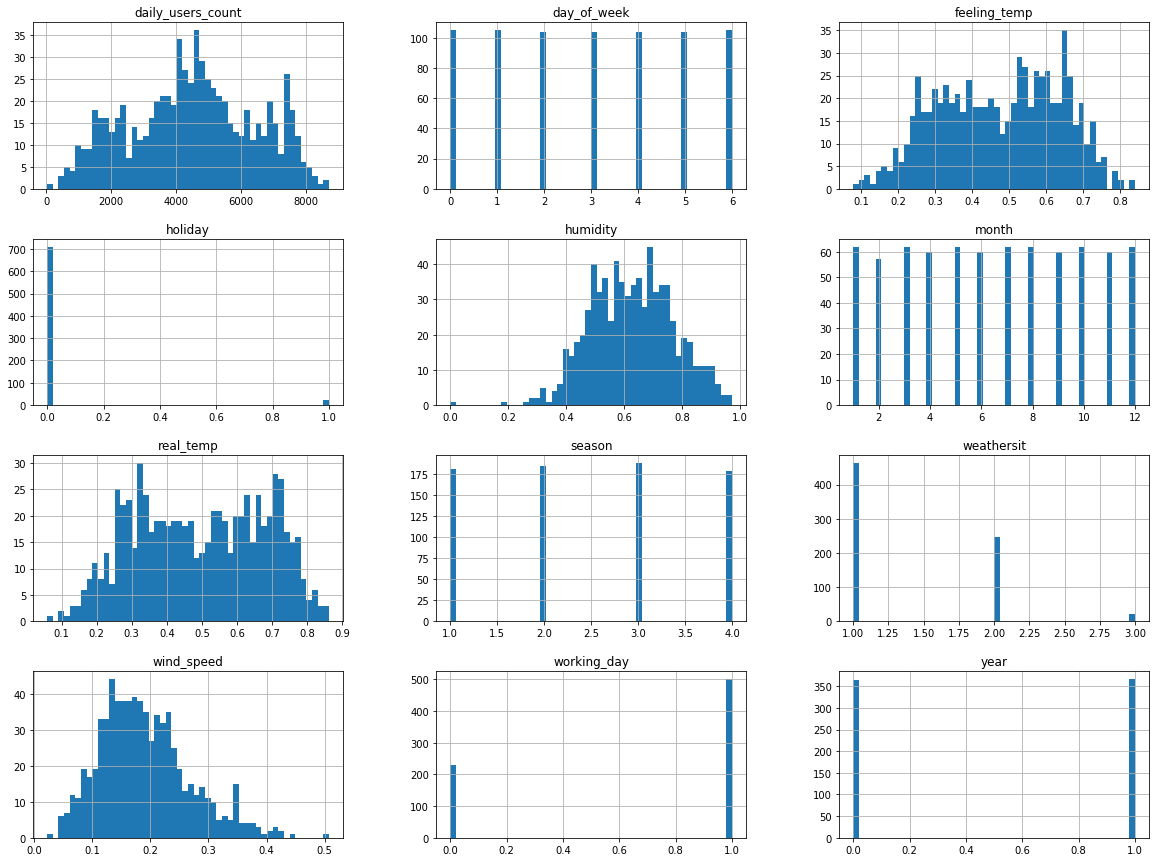

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
sf.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

Observations: 

1. These variables have very different scales. We will discuss this later in this chapter when we explore feature scaling.

2. Many histograms are right skewed: they extend much farther to the right of the median than to the left. This may make it a bit harder for some Machine Learning algorithms to detect patterns. We will try transforming these attributes later on to have more bell-shaped distributions.

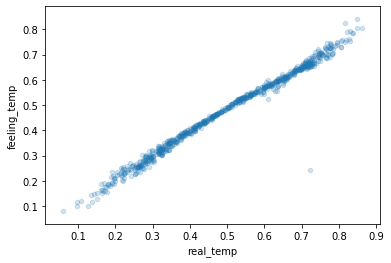

In [6]:
sf.plot(kind="scatter", x="real_temp", y="feeling_temp", alpha=0.2)
plt.savefig('map1.png')

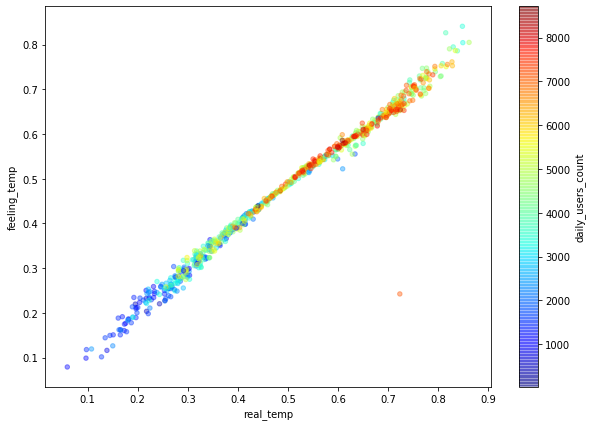

In [7]:
sf.plot(kind="scatter", x="real_temp", y="feeling_temp", alpha=0.4, figsize=(10,7),
    c="daily_users_count", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.savefig('map2.png')

Now let’s look at how much each independent variable correlates with the daily_users_count.

In [8]:
corr_matrix = sf.corr()
corr_matrix["daily_users_count"].sort_values(ascending=False)

daily_users_count    1.000000
feeling_temp         0.631066
real_temp            0.627494
year                 0.566710
season               0.406100
month                0.279977
day_of_week          0.067443
working_day          0.061156
holiday             -0.068348
humidity            -0.100659
wind_speed          -0.234545
weathersit          -0.297391
Name: daily_users_count, dtype: float64

The daily_users_count tends to go up when the real_temp and feeling_temp go up. You can see a small negative correlation between the weathersit and the daily_users_count. Finally, coefficients close to zero mean that there is no linear correlation.

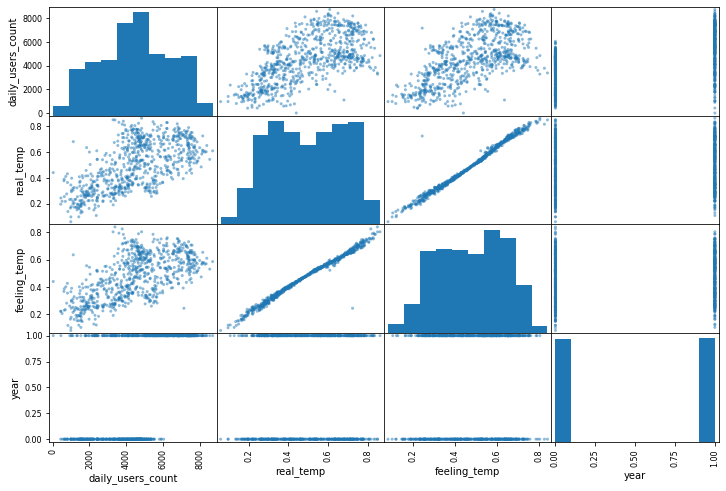

In [9]:
from pandas.plotting import scatter_matrix

attributes = ["daily_users_count", "real_temp", "feeling_temp", "year"]
scatter_matrix(sf[attributes], figsize=(12, 8))
plt.savefig('matrix.png')

The most promising variable to predict the daily_users_count is the real_temp, so let’s zoom in on their correlation scatterplot

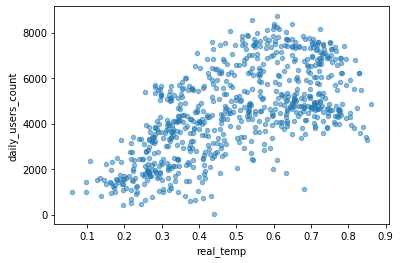

In [10]:
sf.plot(kind="scatter", x="real_temp", y="daily_users_count", alpha=0.5)
plt.savefig('scatter.png')

First, the correlation is indeed very strong; you can clearly see the upward trend and the points are not too dispersed.

In [11]:
sf.head()

,season,year,month,holiday,day_of_week,working_day,weathersit,real_temp,feeling_temp,humidity,wind_speed,daily_users_count
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [12]:
sf.columns

Index(['season', 'year', 'month', 'holiday', 'day_of_week', 'working_day',
       'weathersit', 'real_temp', 'feeling_temp', 'humidity', 'wind_speed',
       'daily_users_count'],
      dtype='object')

In [13]:
sf = sf[['season', 'year', 'month', 'holiday', 'day_of_week', 'working_day',
       'weathersit', 'real_temp', 'feeling_temp', 'humidity', 'wind_speed',
       'daily_users_count']]
sf.head()

,season,year,month,holiday,day_of_week,working_day,weathersit,real_temp,feeling_temp,humidity,wind_speed,daily_users_count
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


Create dummy variables for two categorical variables.

In [14]:
X = sf[['season', 'year', 'month', 'holiday', 'day_of_week', 'working_day',
       'weathersit', 'real_temp', 'feeling_temp', 'humidity', 'wind_speed']]
Y = sf['daily_users_count']

In [15]:
sf.drop(['daily_users_count'], axis=1, inplace=True)

In [16]:
#create dummy variables
cat_vars=['season','year','month','holiday', 'day_of_week', 'working_day', 'weathersit']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(sf[var], prefix=var)
    sf1=sf.join(cat_list)
    sf=sf1
cat_vars=['season','year','month','holiday', 'day_of_week', 'working_day', 'weathersit']
sf_vars=sf.columns.values.tolist()
to_keep=[i for i in sf_vars if i not in cat_vars]

In [17]:
X=sf[to_keep]
X.columns.values

array(['real_temp', 'feeling_temp', 'humidity', 'wind_speed', 'season_1',
       'season_2', 'season_3', 'season_4', 'year_0', 'year_1', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'holiday_0', 'holiday_1', 'day_of_week_0', 'day_of_week_1',
       'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'day_of_week_5',
       'day_of_week_6', 'working_day_0', 'working_day_1', 'weathersit_1',
       'weathersit_2', 'weathersit_3'], dtype=object)

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 36 columns):
real_temp        731 non-null float64
feeling_temp     731 non-null float64
humidity         731 non-null float64
wind_speed       731 non-null float64
season_1         731 non-null uint8
season_2         731 non-null uint8
season_3         731 non-null uint8
season_4         731 non-null uint8
year_0           731 non-null uint8
year_1           731 non-null uint8
month_1          731 non-null uint8
month_2          731 non-null uint8
month_3          731 non-null uint8
month_4          731 non-null uint8
month_5          731 non-null uint8
month_6          731 non-null uint8
month_7          731 non-null uint8
month_8          731 non-null uint8
month_9          731 non-null uint8
month_10         731 non-null uint8
month_11         731 non-null uint8
month_12         731 non-null uint8
holiday_0        731 non-null uint8
holiday_1        731 non-null uint8
day_of_week_0    731 no

In [19]:
X.shape

(731, 36)

In [20]:
Y.shape

(731,)

Standardization of the data

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [23]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Done! We now have a working Linear Regression model.

In [24]:
y_pred = regressor.predict(X_test)
print('Liner Regression R squared: %.4f' % regressor.score(X_test, y_test))

Liner Regression R squared: 0.8554


So, in our model, 85.54% of the variability in Y can be explained using X. It is exciting.

Calculate root-mean-square error (RMSE)

In [25]:
import numpy as np
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Liner Regression RMSE: %.4f' % lin_rmse)

Liner Regression RMSE: 772.5217


Our model was able to predict the count of every day in the test set within 772.5217 of the real count.

Calculate mean absolute error (MAE)

In [26]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_pred, y_test)
print('Liner Regression MAE: %.4f' % lin_mae)

Liner Regression MAE: 587.7622


let’s try a more complex model to see whether results can be improved - the RandomForestRegressor

In [27]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [28]:
print('Random Forest R squared": %.4f' % forest_reg.score(X_test, y_test))

Random Forest R squared": 0.8851


In [29]:
y_pred = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE: %.4f' % forest_rmse)

Random Forest RMSE: 688.6754


Much better! Let's try one more.

In [30]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
model = ensemble.GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [31]:
print('Gradient Boosting R squared": %.4f' % model.score(X_test, y_test))

Gradient Boosting R squared": 0.8825


In [32]:
y_pred = model.predict(X_test)
model_mse = mean_squared_error(y_pred, y_test)
model_rmse = np.sqrt(model_mse)
print('Gradient Boosting RMSE: %.4f' % model_rmse)

Gradient Boosting RMSE: 696.4418


I would consider the RandomForestRegressor as our final model, let's print out feature importance

In [33]:
feature_labels = np.array(['real_temp', 'feeling_temp', 'humidity', 'wind_speed', 'season_1',
       'season_2', 'season_3', 'season_4', 'year_0', 'year_1', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'holiday_0', 'holiday_1', 'day_of_week_0', 'day_of_week_1',
       'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'day_of_week_5',
       'day_of_week_6', 'working_day_0', 'working_day_1', 'weathersit_1',
       'weathersit_2', 'weathersit_3'])
importance = model.feature_importances_
feature_indexes_by_importance = importance.argsort()[::-1]
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

real_temp-43.70%
year_0-14.72%
year_1-14.70%
humidity-5.73%
feeling_temp-4.94%
season_4-3.85%
season_1-3.62%
wind_speed-2.71%
weathersit_3-2.15%
weathersit_1-1.28%
month_9-0.39%
month_10-0.30%
holiday_0-0.23%
day_of_week_6-0.20%
day_of_week_4-0.18%
working_day_0-0.17%
day_of_week_1-0.17%
holiday_1-0.14%
day_of_week_5-0.13%
season_3-0.12%
month_4-0.11%
working_day_1-0.08%
month_12-0.06%
month_1-0.06%
month_8-0.05%
month_7-0.05%
month_3-0.04%
month_6-0.03%
month_5-0.02%
day_of_week_0-0.02%
day_of_week_2-0.02%
season_2-0.01%
day_of_week_3-0.01%
weathersit_2-0.01%
month_11-0.01%
month_2-0.00%
